<a href="https://colab.research.google.com/github/roggersanguzu/Unclaimed-Funds-recovery-model-v1/blob/main/Unclaimed_Balances_Intelligence_System_(UBIS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unclaimed Balances Intelligence System (UBIS).**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
%matplotlib inline


sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,5)

# ==============================================================
# UBIS Data Merge Pipeline
# ==============================================================

ubis_Behavioral = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UBIS/UBIS_Behavioral_Synthetic_5M.csv.gz')
ubis_Corebanking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UBIS/UBIS_CoreBanking_Synthetic_5M.csv.gz')
ubis_Registry = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UBIS/UBIS_Registry_Synthetic_5M.csv.gz')

print("Datasets loaded successfully.")
print(f"Behavioral: {ubis_Behavioral.shape}")
print(f"CoreBanking: {ubis_Corebanking.shape}")
print(f"Registry: {ubis_Registry.shape}")

print("\n Checking uniqueness of customer_id_hashed...")
print("Behavioral unique IDs:", ubis_Behavioral['customer_id_hashed'].is_unique)
print("CoreBanking unique IDs:", ubis_Corebanking['customer_id_hashed'].is_unique)
print("Registry unique IDs:", ubis_Registry['customer_id_hashed'].is_unique)


Datasets loaded successfully.
Behavioral: (5000000, 12)
CoreBanking: (5000000, 14)
Registry: (5000000, 8)

 Checking uniqueness of customer_id_hashed...
Behavioral unique IDs: True
CoreBanking unique IDs: True
Registry unique IDs: True


**Remove duplicates (if any)**

In [ ]:

ubis_Behavioral.drop_duplicates(subset=['customer_id_hashed'], inplace=True)
ubis_Corebanking.drop_duplicates(subset=['customer_id_hashed'], inplace=True)
ubis_Registry.drop_duplicates(subset=['customer_id_hashed'], inplace=True)


**Merge all datasets on customer_id_hashed**

In [ ]:
print("\n Merging datasets...")
ubis_merged = (
    ubis_Corebanking
    .merge(ubis_Behavioral, on='customer_id_hashed', how='inner')
    .merge(ubis_Registry, on='customer_id_hashed', how='inner')
)

print("Merge complete.")
print(f"Merged dataset shape: {ubis_merged.shape}")



 Merging datasets...
Merge complete.
Merged dataset shape: (5000000, 32)


**data integrity checks**

In [ ]:
print("\n Checking for missing values...")
missing = ubis_merged.isnull().sum()
print(missing[missing > 0])


 Checking for missing values...
Series([], dtype: int64)


In [ ]:
num_cols = ubis_merged.select_dtypes(include=[np.number]).columns
ubis_merged[num_cols] = ubis_merged[num_cols].fillna(ubis_merged[num_cols].median())

**Check for merge consistency**

In [ ]:
expected_rows = len(ubis_Corebanking)
actual_rows = len(ubis_merged)
print(f"\n Merge Retention: {actual_rows / expected_rows * 100:.2f}% of customers retained.")

ubis_merged.to_csv('/content/drive/MyDrive/Colab Notebooks/UBIS/UBIS_Merged_Dataset_5M.csv.gz',
                   index=False, compression='gzip')

print("\nUBIS unified dataset successfully created and saved!")
print(ubis_merged.head(5))


 Merge Retention: 100.00% of customers retained.

UBIS unified dataset successfully created and saved!
                                  customer_id_hashed  account_tenure_days  \
0  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...                 3204   
1  d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...                 3537   
2  4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...                  890   
3  4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...                 1324   
4  ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...                 1160   

   txn_volume_30d  txn_volume_90d  avg_txn_value  peak_txn_value  \
0              13              22    1849.855831     6294.315050   
1              15              27    1392.211597     9495.973477   
2              16              22    1367.566138     6431.197167   
3              14              23    2167.097792    13984.558457   
4              13              23    1043.163770     6508.905587   

   avg_txn_gap_days  mea

**I re-Imported the libraries so that i do not have to re-run  all  the Integrity Checks**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
%matplotlib inline


sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,5)

ubis_sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UBIS/UBIS_Merged_Dataset_5M.csv.gz')
ubis_sample.head(10)

customer_id_hashed  account_tenure_days  \
0  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...                 3204   
1  d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...                 3537   
2  4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...                  890   
3  4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...                 1324   
4  ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...                 1160   
5  e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...                 1125   
6  7902699be42c8a8e46fbbb4501726517e86b22c56a189f...                 3122   
7  2c624232cdd221771294dfbb310aca000a0df6ac8b66b6...                 1668   
8  19581e27de7ced00ff1ce50b2047e7a567c76b1cbaebab...                 2199   
9  4a44dc15364204a80fe80e9039455cc1608281820fe2b2...                  496   

   txn_volume_30d  txn_volume_90d  avg_txn_value  peak_txn_value  \
0              13              22    1849.855831     6294.315050   
1              15              27    1392.211597     9495.973477   
2              16              22    1367.566138     6431.197167   
3              14              23    2167.097792    13984.558457   
4              13              23    1043.163770     6508.905587   
5               5              13    1594.545283     5769.287398   
6              17              24    4009.534427    20136.355906   
7              14              26     990.439550     4137.567033   
8              11              24     548.399991     1181.003795   
9              13              25    2357.171015    10696.910972   

   avg_txn_gap_days  mean_balance_90d  balance_fluctuation_index  \
0          2.142857       1754.844550                   0.927090   
1          1.875000      12259.679675                   0.362104   
2          1.764706      12431.869421                   0.392335   
3          2.000000      11169.495862                   0.805281   
4          2.142857      18109.009196                   0.573507   
5          5.000000       2848.459763                   0.579371   
6          1.666667      13404.120189                   0.344116   
7          2.000000       4556.304400                   0.576239   
8          2.500000       1946.206470                   0.817214   
9          2.142857       1197.291145                   0.116895   

   deposit_withdrawal_ratio  ...  customer_support_contacts_90d  \
0                  1.041045  ...                              2   
1                  1.083442  ...                              1   
2                  1.365999  ...                              0   
3                  1.683490  ...                              0   
4                  1.398660  ...                              3   
5                  1.145956  ...                              0   
6                  1.028230  ...                              1   
7                  1.391037  ...                              0   
8                  1.193663  ...                              2   
9                  1.417200  ...                              0   

   notification_open_rate  last_login_days_ago  death_flag  id_verified  \
0                0.137382                  343           0            1   
1                0.159049                   10           0            1   
2                0.444147                   60           0            1   
3                0.053373                  183           0            0   
4                0.327139                  351           0            1   
5                0.552607                   37           0            1   
6                0.542265                    0           0            1   
7                0.191745                  252           0            1   
8                0.400201                  281           0            1   
9                0.235108                  257           0            1   

   sim_activity  sim_last_active_days_ago address_updated_flag  \
0             1                        10                 

**Here i selected a few random 100000 Datasets to Deal with**

In [ ]:
UBIS_Merged_Dataset=ubis_sample.sample(100000, random_state=42)

In [ ]:
UBIS_Merged_Dataset.describe()

account_tenure_days  txn_volume_30d  txn_volume_90d  avg_txn_value  \
count        100000.000000   100000.000000   100000.000000  100000.000000   
mean           1846.745370       14.999380       25.003940    1948.513418   
std            1050.203185        3.880823        5.001927    1293.848536   
min              30.000000        2.000000        7.000000     151.213481   
25%             936.000000       12.000000       22.000000    1083.848893   
50%            1856.000000       15.000000       25.000000    1622.466446   
75%            2758.000000       17.000000       28.000000    2434.711098   
max            3649.000000       33.000000       49.000000   28207.304809   

       peak_txn_value  avg_txn_gap_days  mean_balance_90d  \
count   100000.000000     100000.000000     100000.000000   
mean     11696.625250          2.000542       6105.381833   
std       9473.253393          0.559543       5769.897136   
min        436.200017          1.000000        179.892927   
25%       5416.434156          1.666667       2579.256371   
50%       9095.897628          1.875000       4419.776310   
75%      14910.367914          2.307692       7610.941480   
max     184460.542536         10.000000     191308.201737   

       balance_fluctuation_index  deposit_withdrawal_ratio  \
count              100000.000000             100000.000000   
mean                    0.524810                  1.200560   
std                     0.273253                  0.398085   
min                     0.050000                  0.100000   
25%                     0.289874                  0.931858   
50%                     0.524906                  1.200113   
75%                     0.759777                  1.469666   
max                     0.999997                  2.774089   

       loan_activity_flag  ...  customer_support_contacts_90d  \
count        100000.00000  ...                  100000.000000   
mean              0.19908  ...                       1.202140   
std               0.39931  ...                       1.098914   
min               0.00000  ...                       0.000000   
25%               0.00000  ...                       0.000000   
50%               0.00000  ...                       1.000000   
75%               0.00000  ...                       2.000000   
max               1.00000  ...                       9.000000   

       notification_open_rate  last_login_days_ago     death_flag  \
count           100000.000000        100000.000000  100000.000000   
mean                 0.399191           182.193920       0.015260   
std                  0.200059           105.407428       0.122586   
min                  0.000678             0.000000       0.000000   
25%                  0.242166            91.000000       0.000000   
50%                  0.384492           183.000000       0.000000   
75%                  0.543400           273.000000       0.000000   
max                  0.988845           364.000000       1.000000   

         id_verified   sim_activity  sim_last_active_days_ago  \
count  100000.000000  100000.000000             100000.000000   
mean        0.899860       0.850760                 42.374390   
std         0.300188       0.356327                 75.545719   
min         0.000000       0.000000                  0.000000   
25%         1.000000       1.000000                  9.000000   
50%         1.000000       1.000000                 18.000000   
75%         1.000000       1.000000                 27.000000   
max         1.000000       1.000000                365.000000   

       address_updated_flag  next_of_kin_registered  nida_match_score  
count         100000.000000           100000.000000     100000.000000  
mean               0.701070                0.700660          0.799553  
std                0.457791                0.457971          0.120524  
min                0.000000                0.000000          0.228803  
25%                0.000000                0.00000

**Dataset Overview**

In [ ]:
UBIS_Merged_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3577888 to 4920643
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id_hashed             100000 non-null  object 
 1   account_tenure_days            100000 non-null  int64  
 2   txn_volume_30d                 100000 non-null  int64  
 3   txn_volume_90d                 100000 non-null  int64  
 4   avg_txn_value                  100000 non-null  float64
 5   peak_txn_value                 100000 non-null  float64
 6   avg_txn_gap_days               100000 non-null  float64
 7   mean_balance_90d               100000 non-null  float64
 8   balance_fluctuation_index      100000 non-null  float64
 9   deposit_withdrawal_ratio       100000 non-null  float64
 10  loan_activity_flag             100000 non-null  int64  
 11  bill_payment_count             100000 non-null  int64  
 12  atm_withdrawal_count        

***Statistical Summary***

In [ ]:
display(UBIS_Merged_Dataset.describe(include='all').T)

count  unique  \
customer_id_hashed               100000  100000   
account_tenure_days            100000.0     NaN   
txn_volume_30d                 100000.0     NaN   
txn_volume_90d                 100000.0     NaN   
avg_txn_value                  100000.0     NaN   
peak_txn_value                 100000.0     NaN   
avg_txn_gap_days               100000.0     NaN   
mean_balance_90d               100000.0     NaN   
balance_fluctuation_index      100000.0     NaN   
deposit_withdrawal_ratio       100000.0     NaN   
loan_activity_flag             100000.0     NaN   
bill_payment_count             100000.0     NaN   
atm_withdrawal_count           100000.0     NaN   
days_since_last_txn            100000.0     NaN   
login_freq_30d                 100000.0     NaN   
avg_session_duration           100000.0     NaN   
device_count                   100000.0     NaN   
primary_channel                  100000       4   
failed_login_rate              100000.0     NaN   
response_delay_mean            100000.0     NaN   
geo_variance                   100000.0     NaN   
mobile_app_updates             100000.0     NaN   
customer_support_contacts_90d  100000.0     NaN   
notification_open_rate         100000.0     NaN   
last_login_days_ago            100000.0     NaN   
death_flag                     100000.0     NaN   
id_verified                    100000.0     NaN   
sim_activity                   100000.0     NaN   
sim_last_active_days_ago       100000.0     NaN   
address_updated_flag           100000.0     NaN   
next_of_kin_registered         100000.0     NaN   
nida_match_score               100000.0     NaN   

                                                                             top  \
customer_id_hashed             eddf33d02c7d3487eb87f3694c5c519cc3aed9ccddf253...   
account_tenure_days                                                          NaN   
txn_volume_30d                                                               NaN   
txn_volume_90d                                                               NaN   
avg_txn_value                                                                NaN   
peak_txn_value                                                               NaN   
avg_txn_gap_days                                                             NaN   
mean_balance_90d                                                             NaN   
balance_fluctuation_index                                                    NaN   
deposit_withdrawal_ratio                                                     NaN   
loan_activity_flag                                                           NaN   
bill_payment_count                                                           NaN   
atm_withdrawal_count                                                         NaN   
days_since_last_txn                                                          NaN   
login_freq_30d                                                               NaN   
avg_session_duration                                                         NaN   
device_count                                                                 NaN   
primary_channel                                                           mobile   
failed_login_rate                                                            NaN   
response_delay_mean                                                          NaN   
geo_variance                                                                 NaN   
mobile_app_updates                                                           NaN   
customer_support_contacts_90d                                                NaN   
notification_open_rate                                                       NaN   
last_login_days_ago                                                          NaN   
death_flag                                                                   NaN   
id_verified                                                                  NaN  

In [ ]:
missing = UBIS_Merged_Dataset.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\n Missing Values:")
missing


 Missing Values:


Series([], dtype: int64)

**Visualize missingness**

In [ ]:
if not missing.empty:
    plt.figure(figsize=(12, 5))
    sns.barplot(x=missing.index, y=missing.values, palette="Reds_r")
    plt.title("Missing Values per Feature")
    plt.xticks(rotation=90)
    plt.show()

**Univariate Analysis (Single Feature Distributions)**

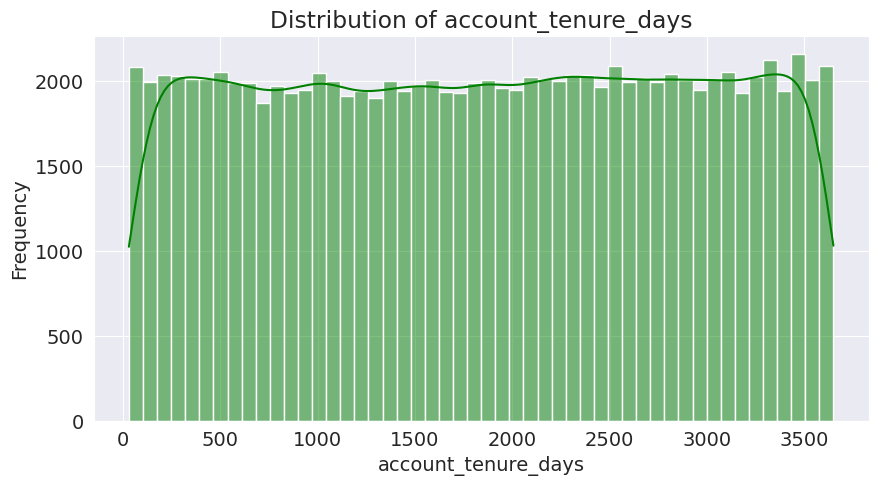

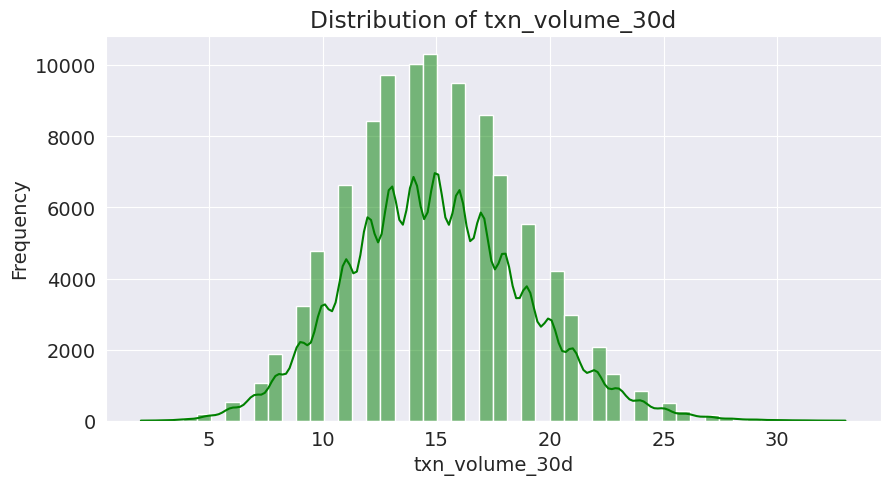

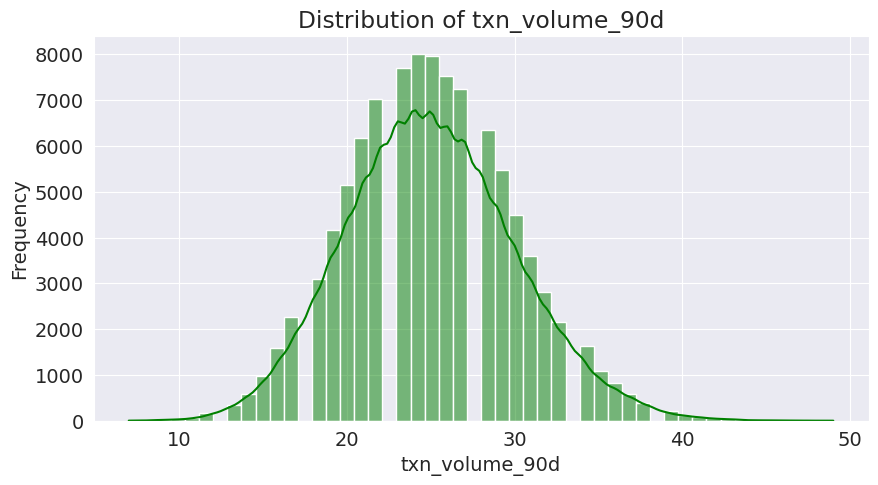

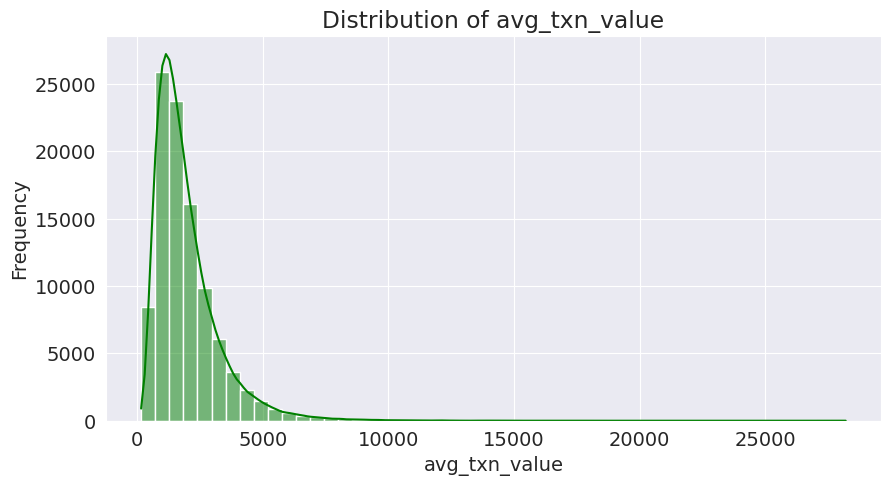

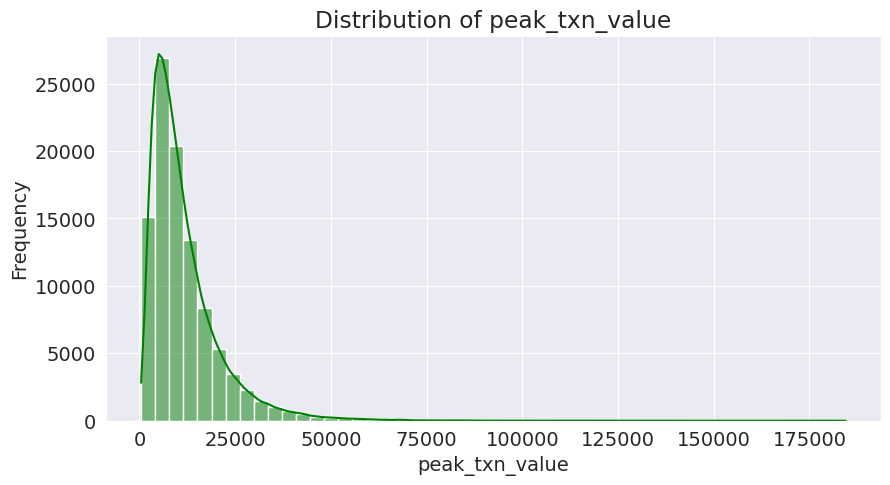

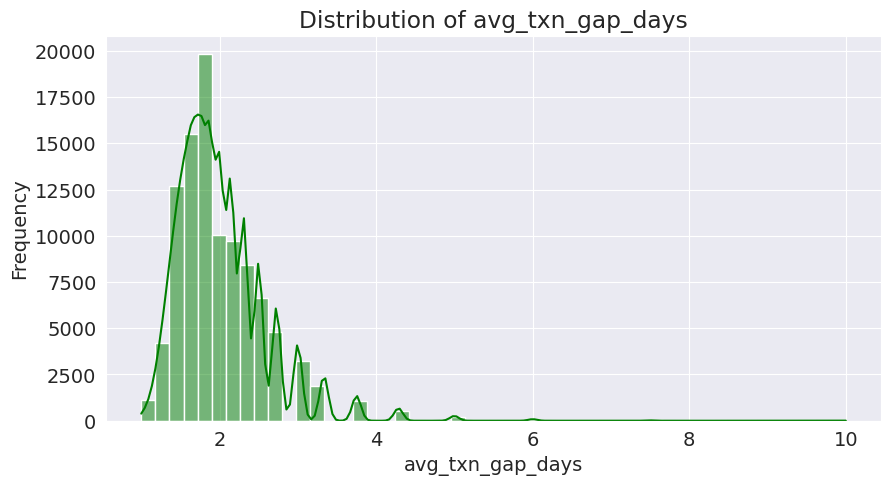

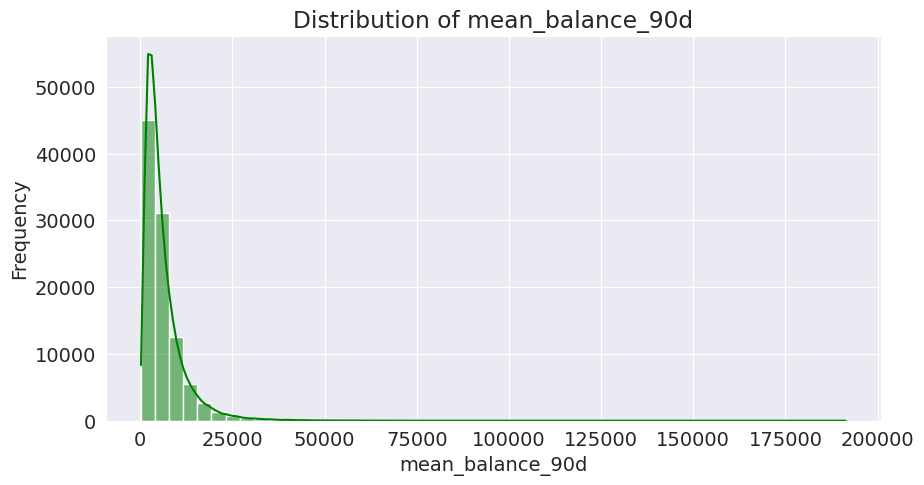

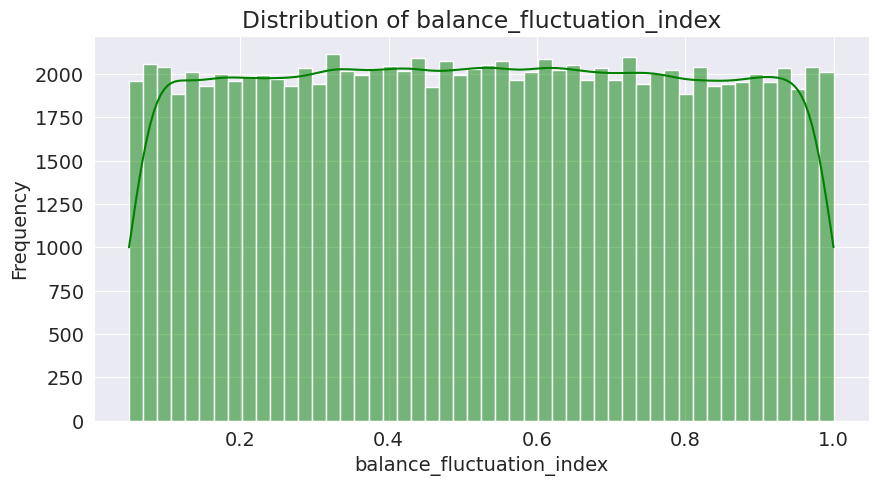

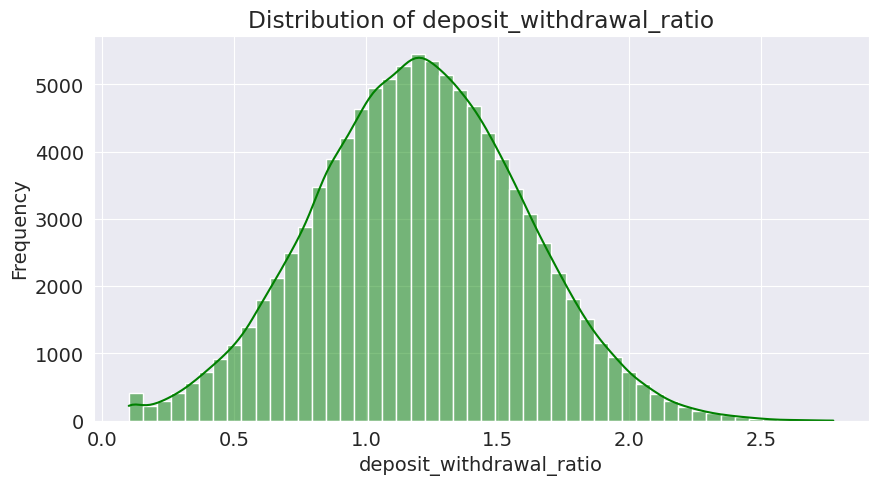

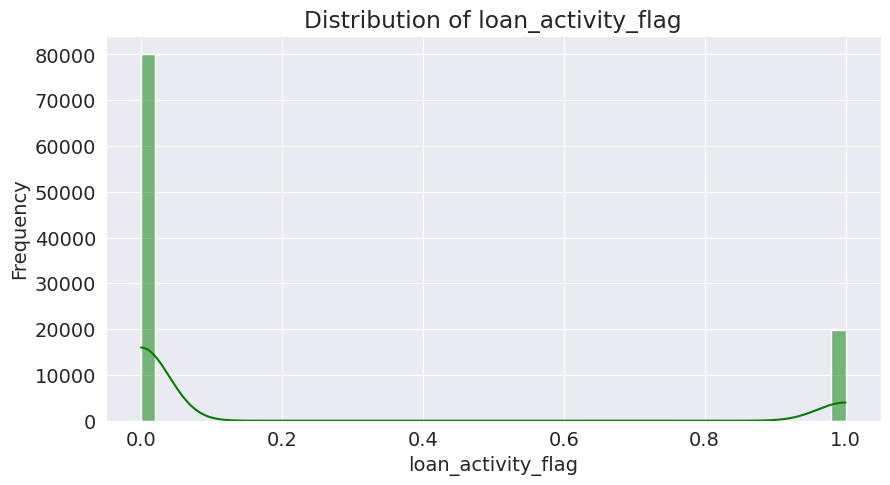

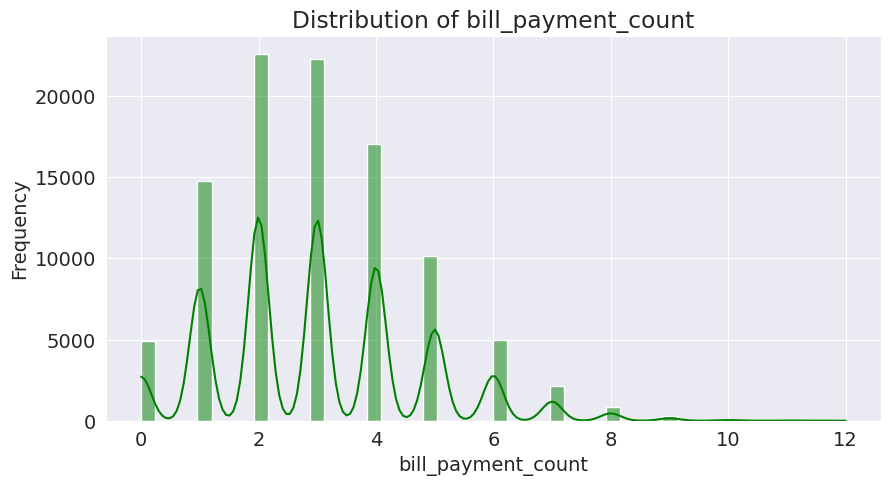

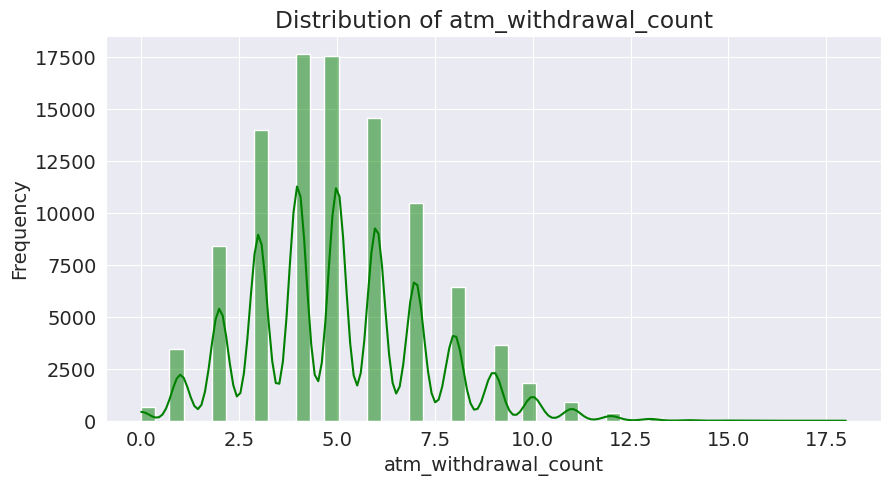

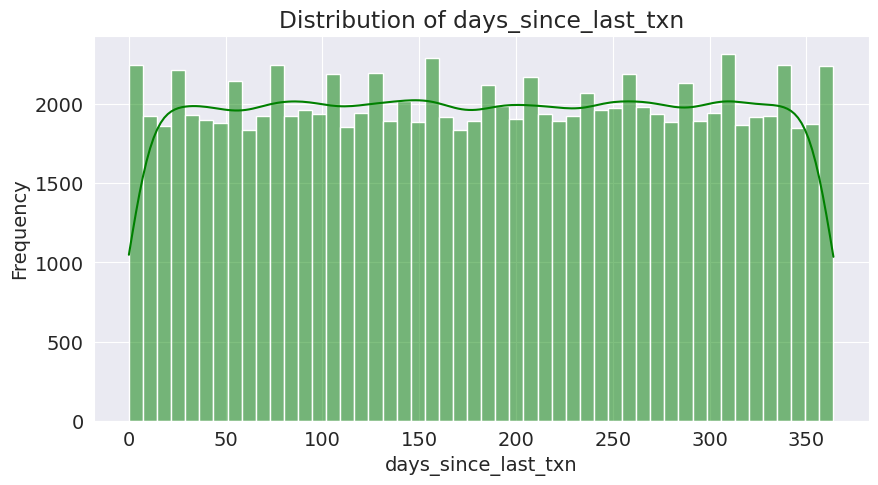

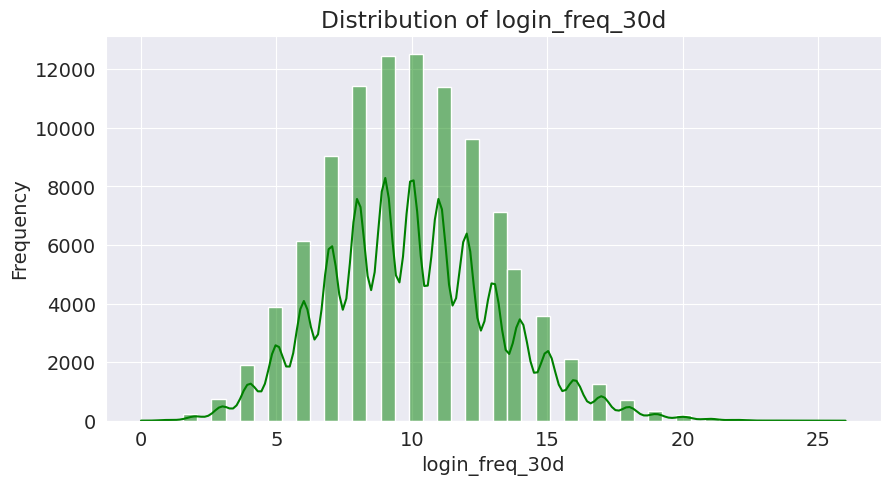

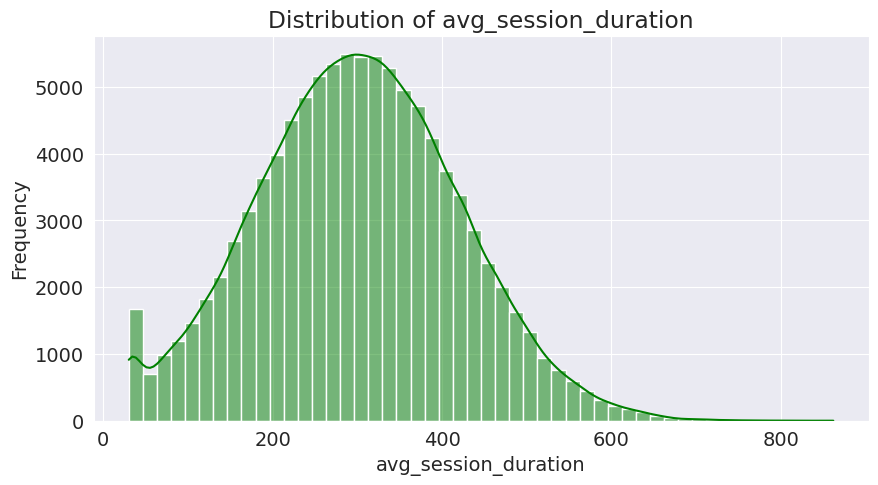

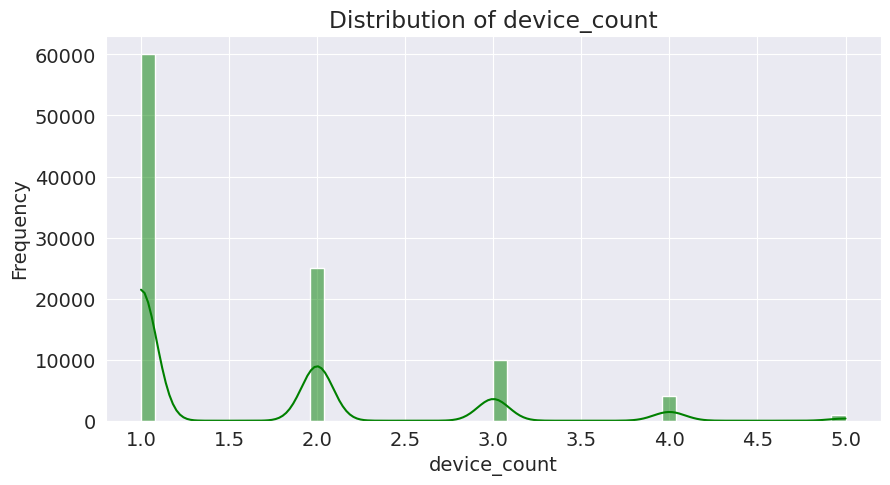

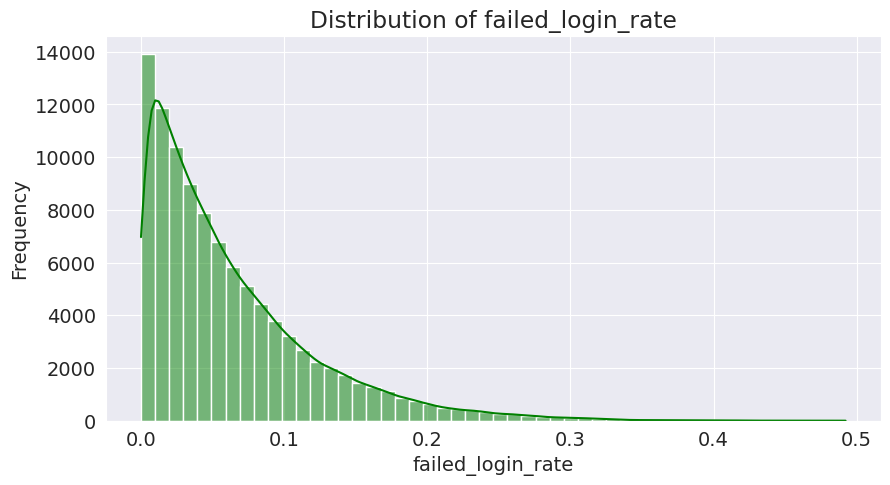

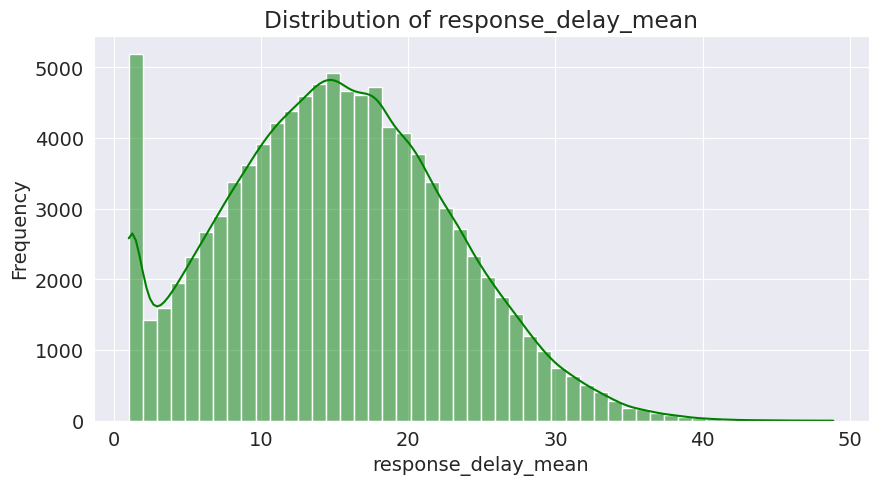

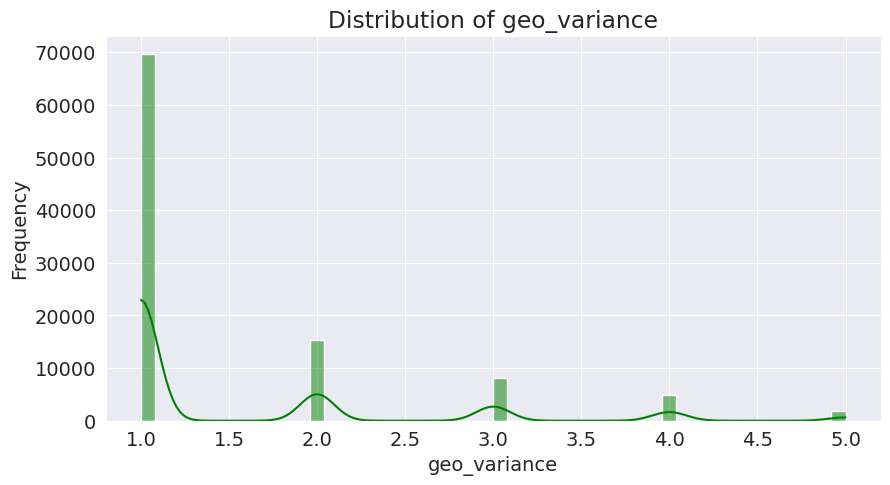

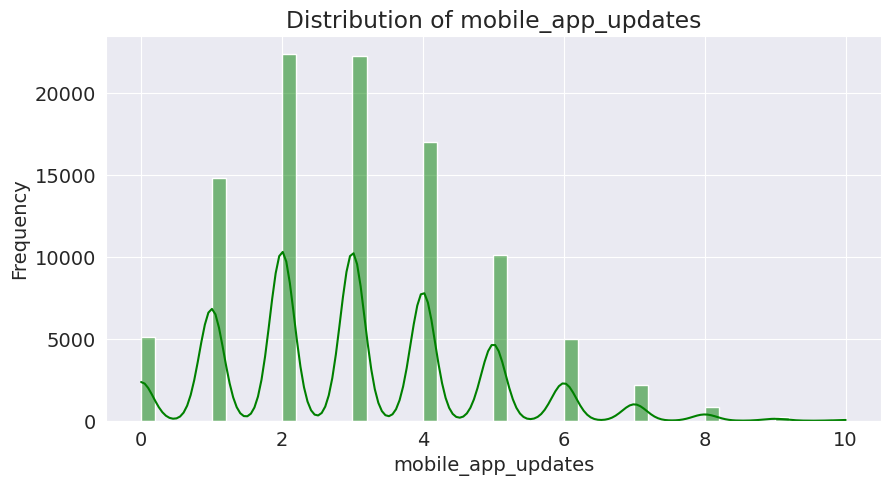

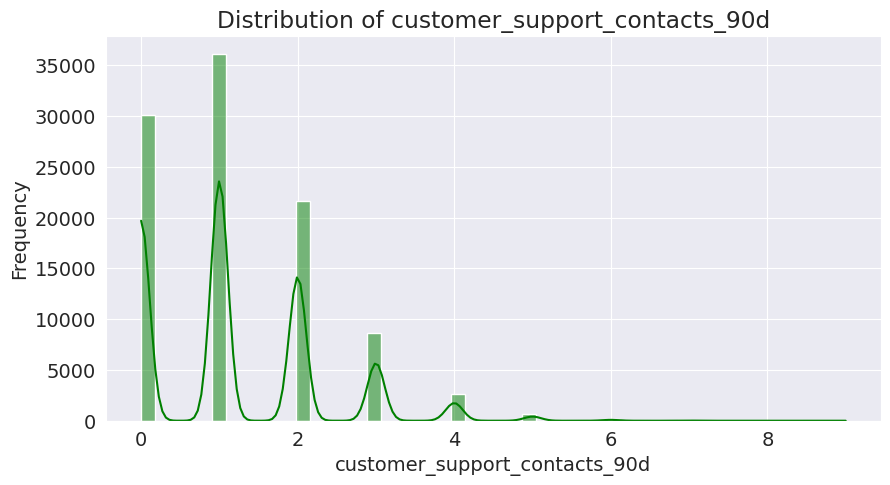

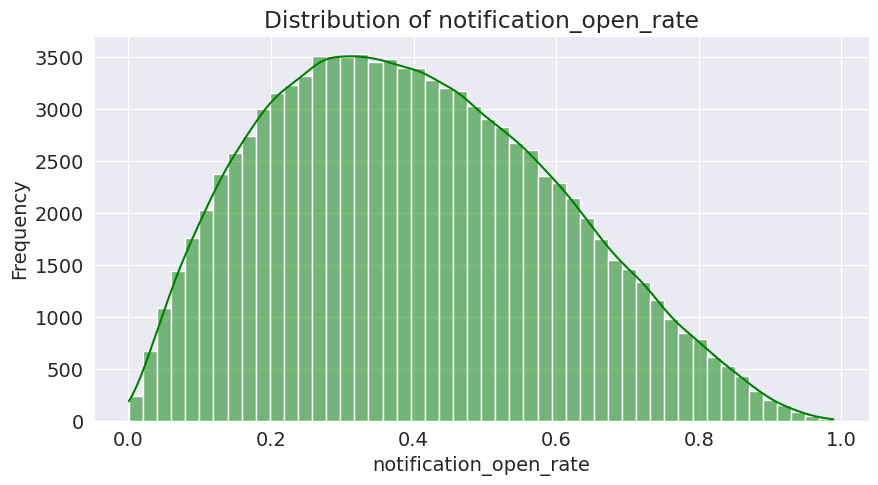

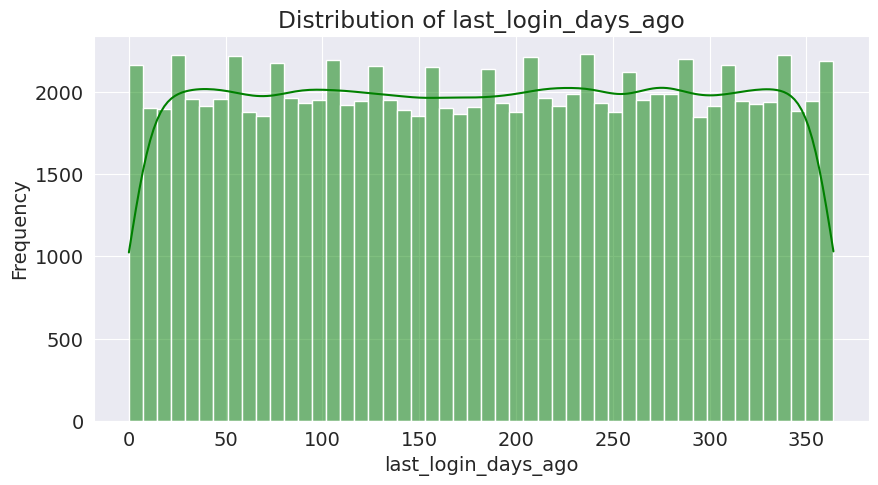

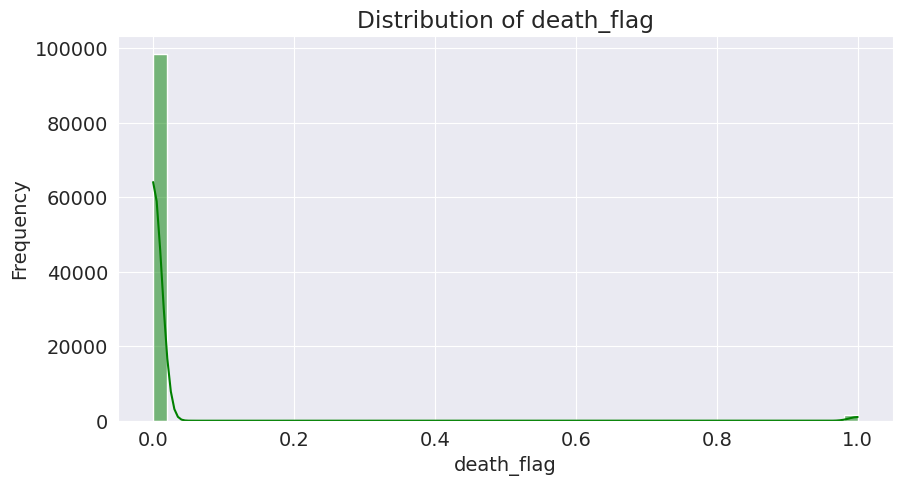

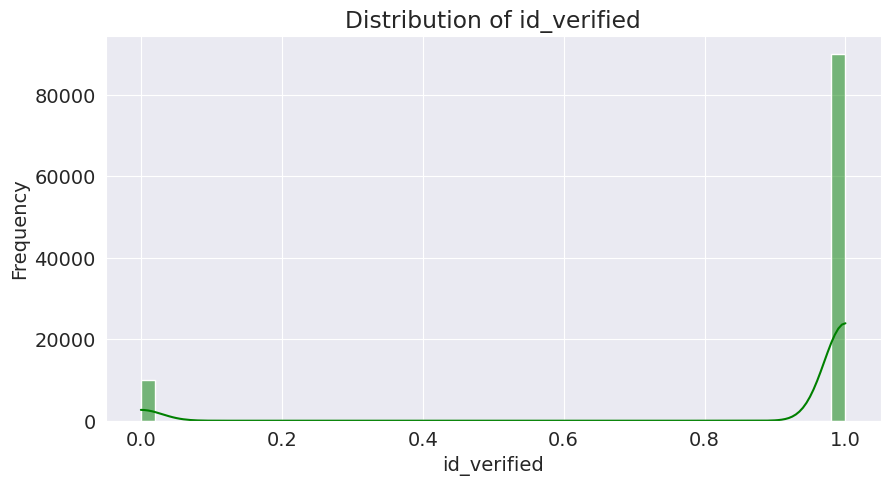

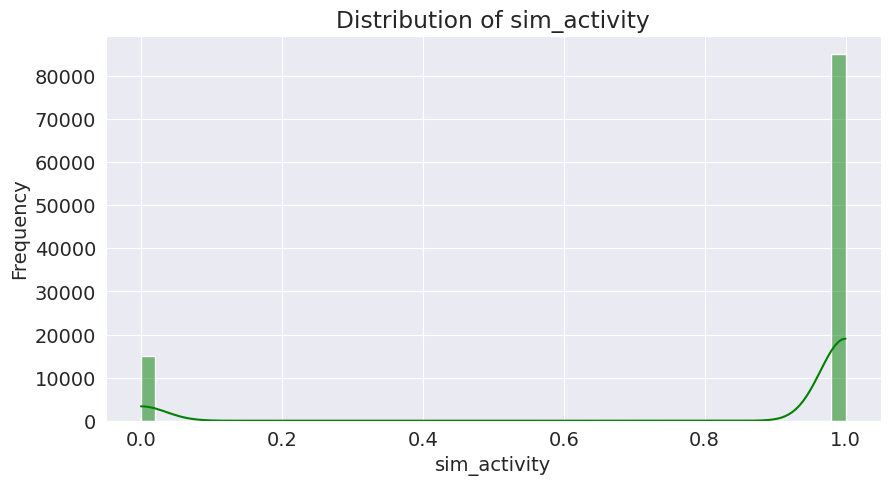

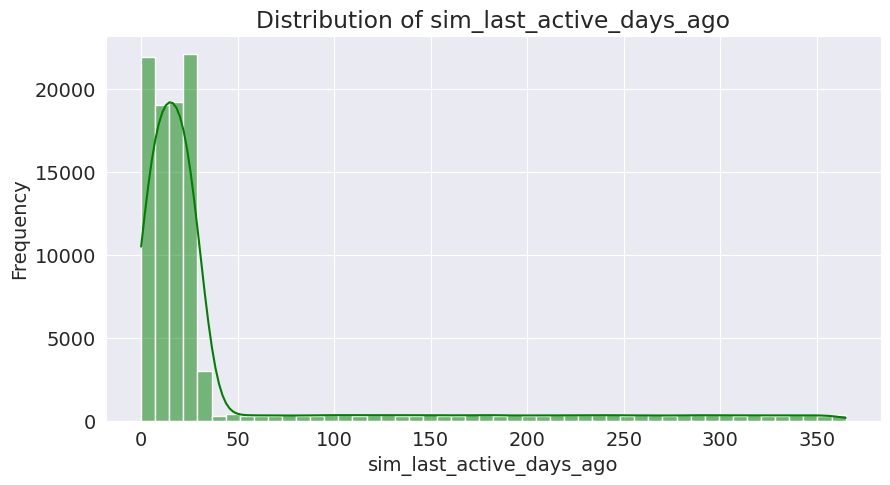

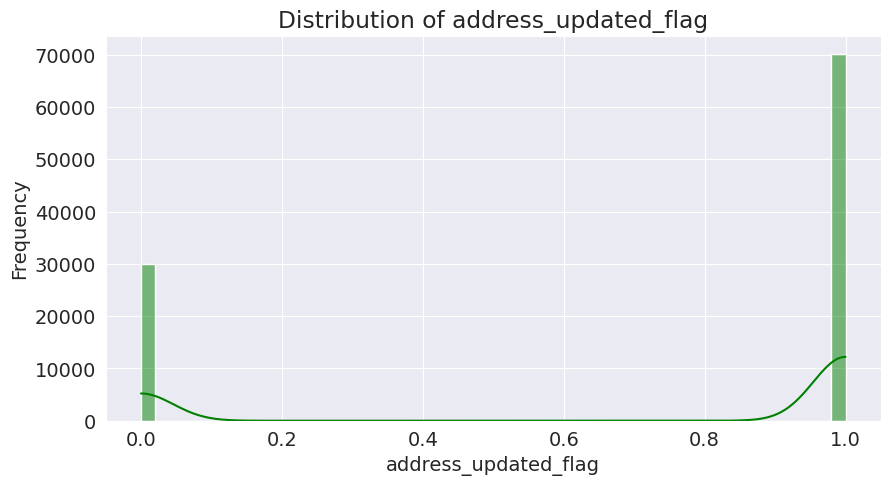

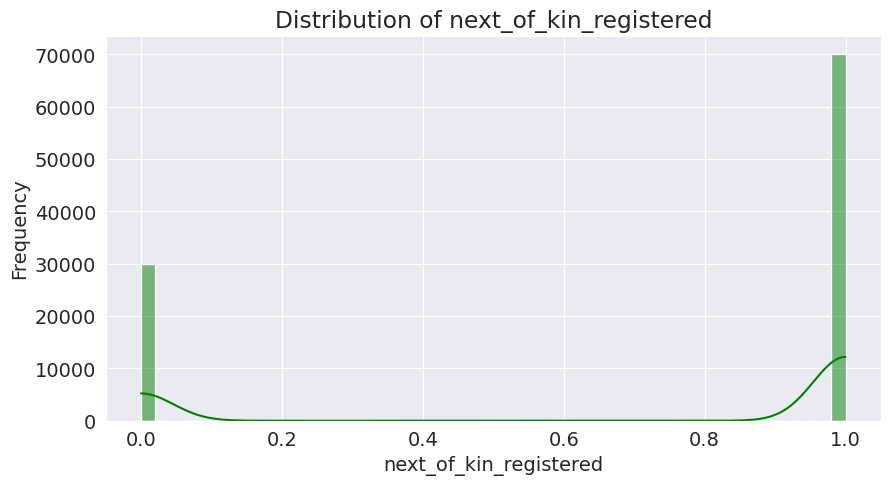

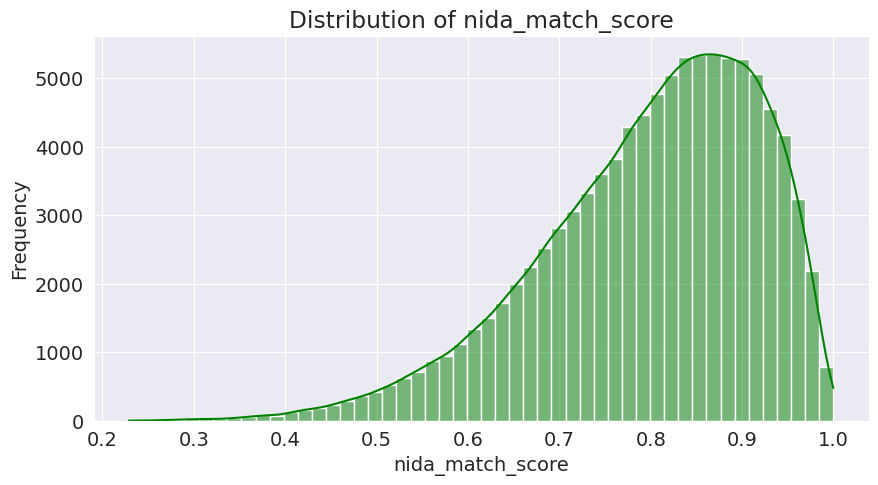

In [ ]:
numeric_cols = UBIS_Merged_Dataset.select_dtypes(include=np.number).columns

for col in numeric_cols[:32]:
    plt.figure()
    sns.histplot(UBIS_Merged_Dataset[col], bins=50, kde=True, color='green')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
for col in ['avg_txn_value', 'peak_txn_value', 'mean_balance_90d']:
    fig = px.histogram(UBIS_Merged_Dataset, x=col, nbins=60, title=f"Interactive Distribution: {col}")
    fig.show()


**Categorical / Flag Feature Analysis**

/tmp/ipython-input-2409774957.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




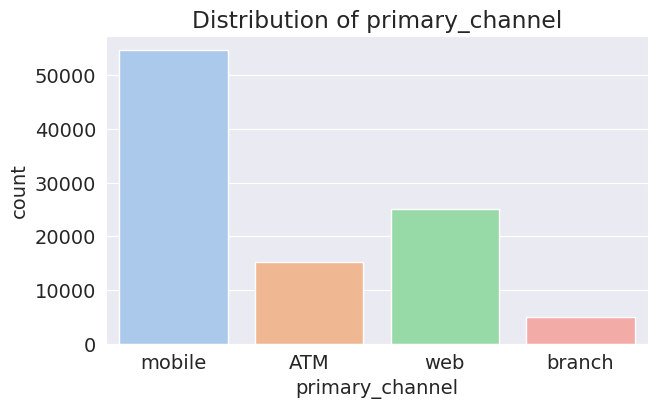

/tmp/ipython-input-2409774957.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




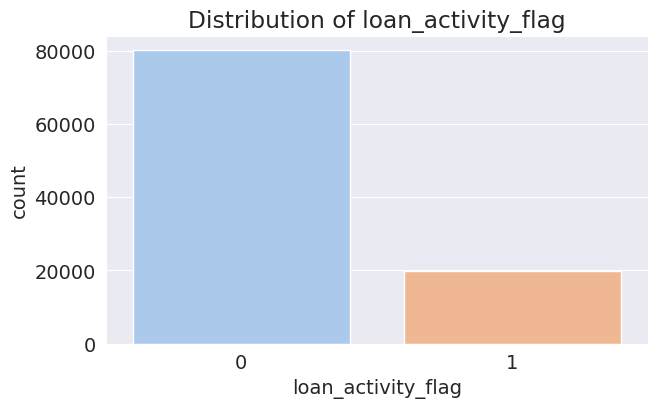

/tmp/ipython-input-2409774957.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




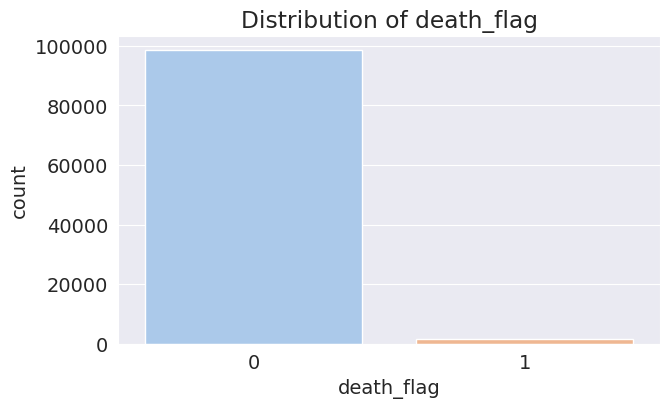

/tmp/ipython-input-2409774957.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




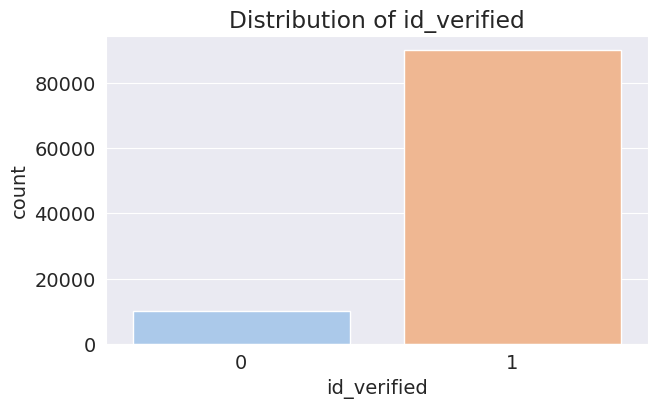

/tmp/ipython-input-2409774957.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




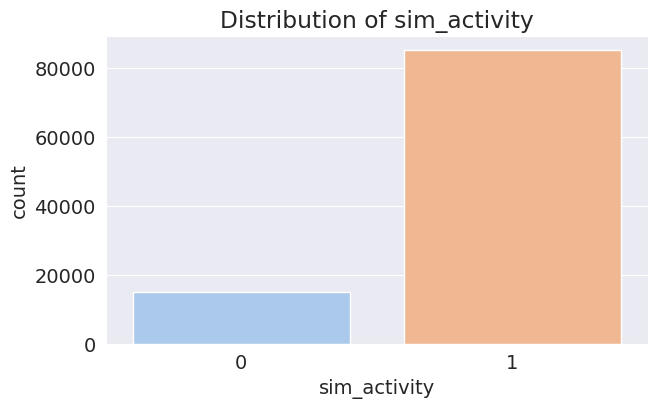

/tmp/ipython-input-2409774957.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




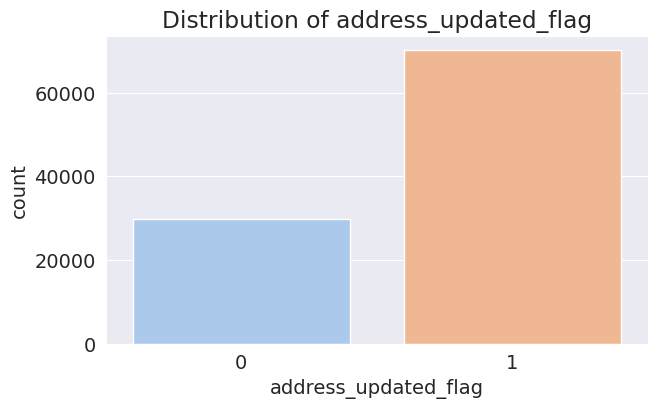

/tmp/ipython-input-2409774957.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




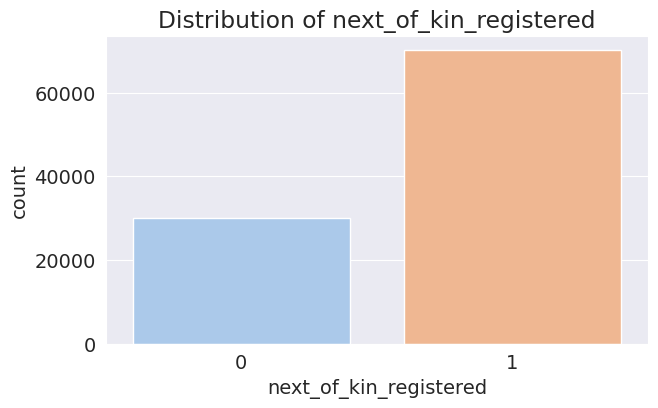

In [ ]:
cat_cols = ['primary_channel', 'loan_activity_flag', 'death_flag',
            'id_verified', 'sim_activity', 'address_updated_flag', 'next_of_kin_registered']

for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=UBIS_Merged_Dataset, x=col, palette='pastel')
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
fig = px.histogram(UBIS_Merged_Dataset, x='primary_channel', color='primary_channel',
                   title='Most Common Banking Channels')
fig.show()


**Bivariate Analysis (Relationships Between Features)**

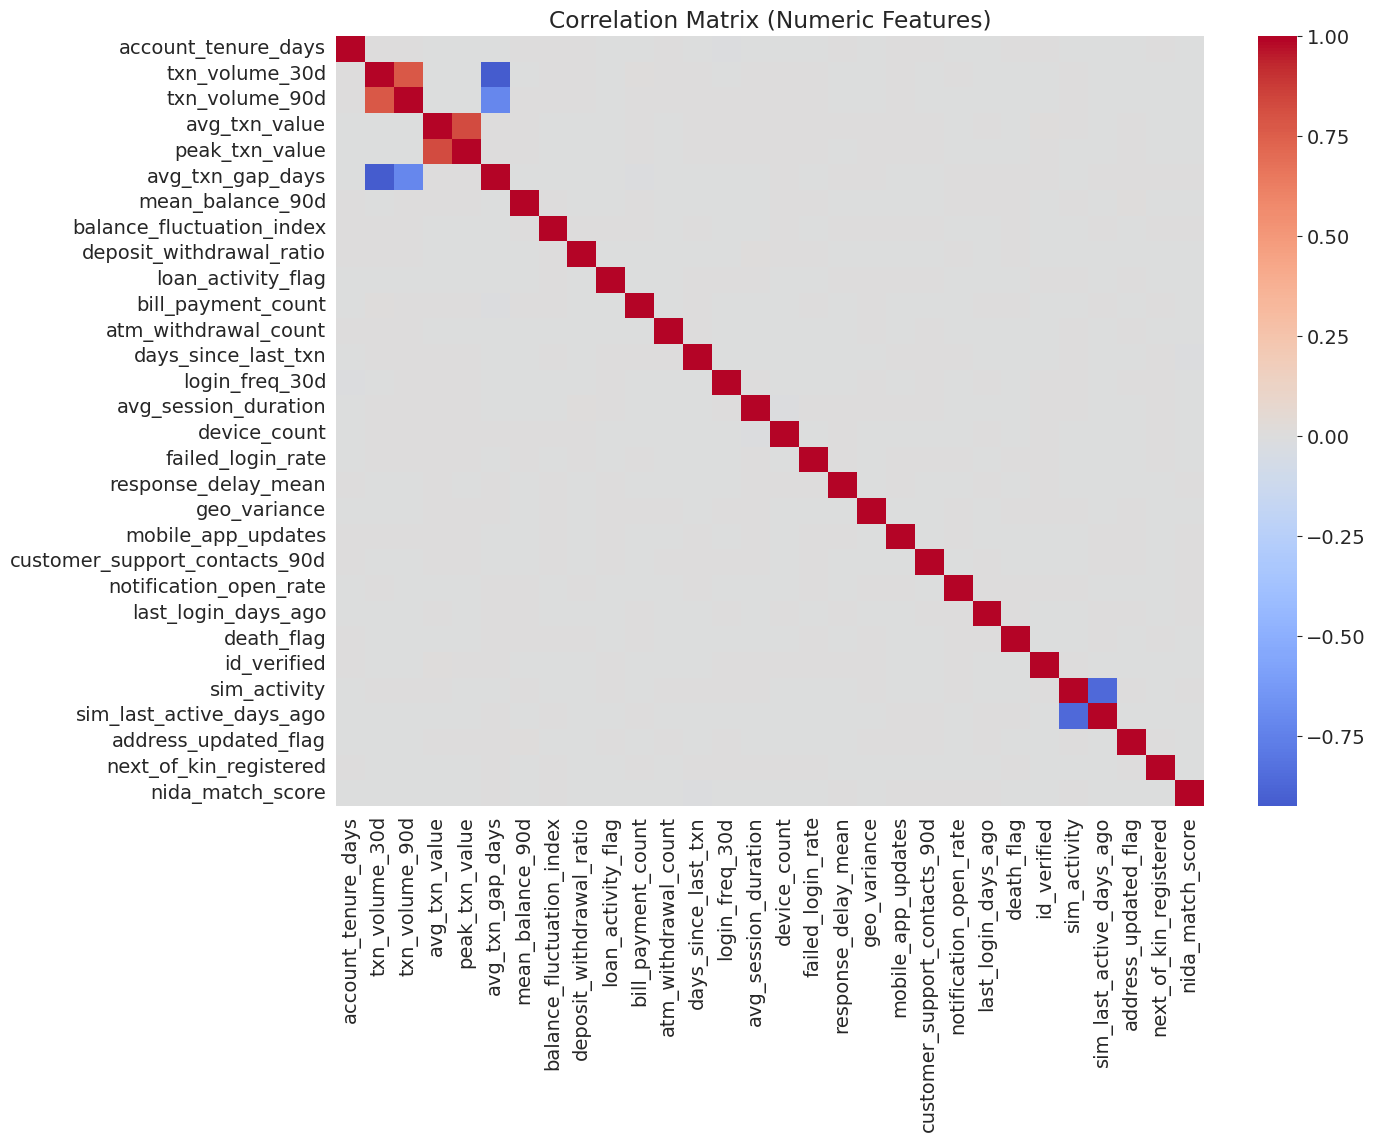

In [ ]:
corr = UBIS_Merged_Dataset.select_dtypes(include=np.number).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


***Top 10 correlated with avg_txn_value***

In [ ]:
corr_target = corr['avg_txn_value'].sort_values(ascending=False)
print("Top correlations with avg_txn_value:\n", corr_target.head(10))


Top correlations with avg_txn_value:
 avg_txn_value                    1.000000
peak_txn_value                   0.821913
id_verified                      0.008152
avg_session_duration             0.005117
mean_balance_90d                 0.004480
customer_support_contacts_90d    0.003517
days_since_last_txn              0.002640
geo_variance                     0.002129
bill_payment_count               0.002077
login_freq_30d                   0.001901
Name: avg_txn_value, dtype: float64


**Scatter Plots (Behavioral vs Financial)**

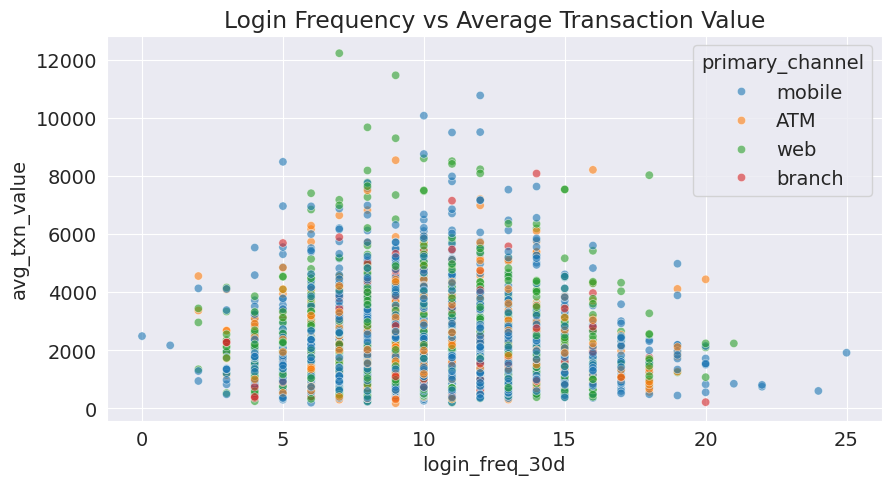

In [ ]:
sns.scatterplot(data=UBIS_Merged_Dataset.sample(5000),
                x='login_freq_30d', y='avg_txn_value', hue='primary_channel', alpha=0.6)
plt.title("Login Frequency vs Average Transaction Value")
plt.show()


In [ ]:
fig = px.scatter(UBIS_Merged_Dataset.sample(5000),
                 x='login_freq_30d', y='avg_txn_value',
                 color='primary_channel', size='mean_balance_90d',
                 hover_data=['geo_variance', 'bill_payment_count'],
                 title='Behavior vs Transaction Value (Interactive)')
fig.show()


**Outlier Detection**

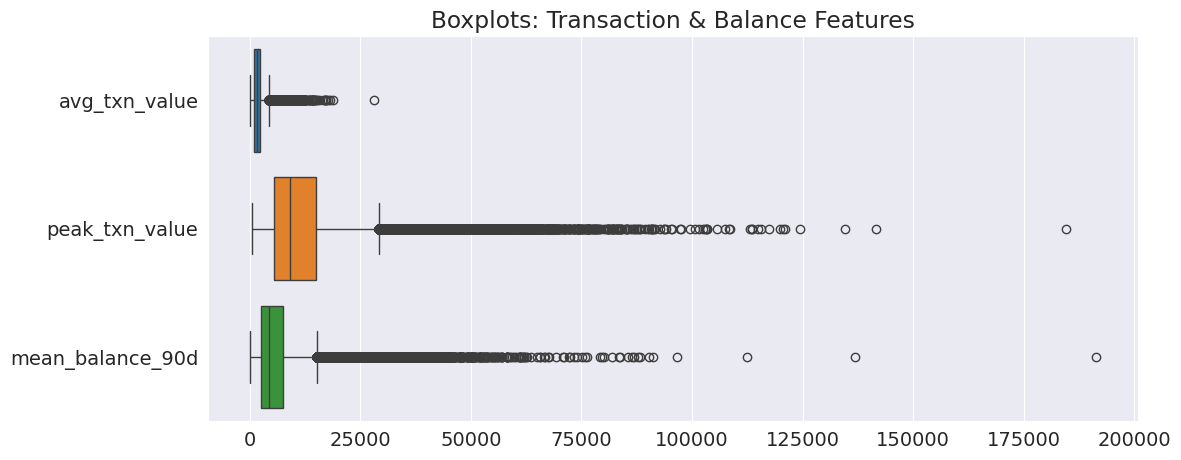

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=UBIS_Merged_Dataset[['avg_txn_value', 'peak_txn_value', 'mean_balance_90d']], orient='h')
plt.title("Boxplots: Transaction & Balance Features")
plt.show()


**Relationship Between Registry & Behavior**

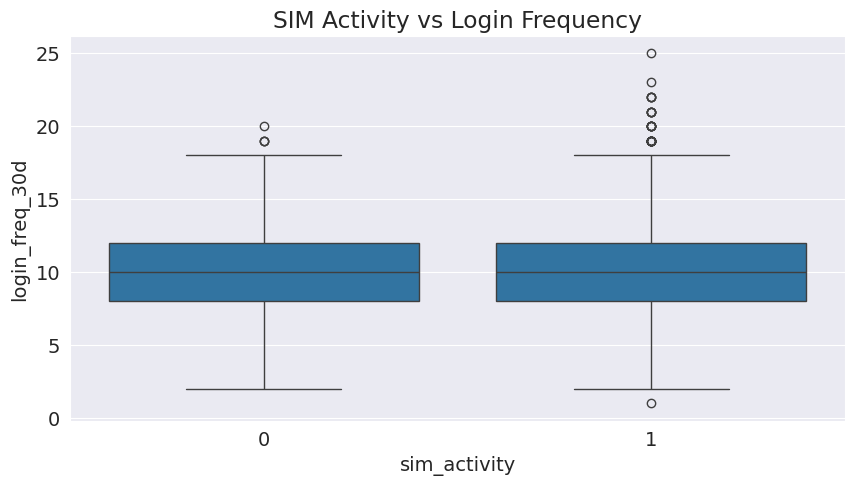

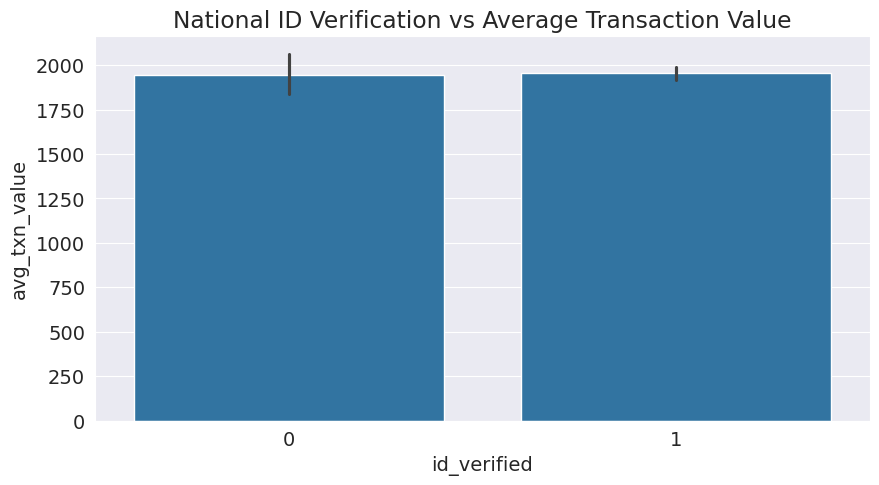

In [ ]:
sns.boxplot(data=UBIS_Merged_Dataset.sample(5000), x='sim_activity', y='login_freq_30d')
plt.title("SIM Activity vs Login Frequency")
plt.show()

sns.barplot(data=UBIS_Merged_Dataset.sample(5000), x='id_verified', y='avg_txn_value', estimator=np.mean)
plt.title("National ID Verification vs Average Transaction Value")
plt.show()


In [ ]:
fig = px.scatter_matrix(
    UBIS_Merged_Dataset.sample(3000),
    dimensions=['avg_txn_value', 'login_freq_30d', 'mean_balance_90d', 'geo_variance', 'nida_match_score'],
    color='primary_channel',
    title="UBIS Multi-Feature Interactive Scatter Matrix"
)
fig.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

**Dropping Irrelevant Columns**

In [ ]:
UBIS_Merged_Dataset.drop(columns=['customer_id_hashed'], inplace=True, errors='ignore')

**Handle Missing Values**

In [ ]:

num_cols = UBIS_Merged_Dataset.select_dtypes(include=np.number).columns
UBIS_Merged_Dataset[num_cols] = UBIS_Merged_Dataset[num_cols].fillna(UBIS_Merged_Dataset[num_cols].median())


cat_cols = UBIS_Merged_Dataset.select_dtypes(exclude=np.number).columns
UBIS_Merged_Dataset[cat_cols] = UBIS_Merged_Dataset[cat_cols].fillna(UBIS_Merged_Dataset[cat_cols].mode().iloc[0])


Features like transaction values or balances are often right-skewed.
Use log transform to make them more normally distributed:

In [ ]:
skewed_features = ['avg_txn_value', 'peak_txn_value', 'mean_balance_90d']
for col in skewed_features:
    UBIS_Merged_Dataset[f'log_{col}'] = np.log1p(UBIS_Merged_Dataset[col])


**Create Derived / Ratio Features (custom to UBIS)**

These engineered features capture behavioral and financial relationships that raw data misses

In [ ]:
# Transaction ratio (recent activity intensity)
UBIS_Merged_Dataset['txn_activity_ratio'] = UBIS_Merged_Dataset['txn_volume_30d'] / (UBIS_Merged_Dataset['txn_volume_90d'] + 1)

# Balance stability index
UBIS_Merged_Dataset['balance_stability'] = 1 - UBIS_Merged_Dataset['balance_fluctuation_index']

# Customer engagement index (blending login + response)
UBIS_Merged_Dataset['engagement_index'] = (
    (UBIS_Merged_Dataset['login_freq_30d'] / 30) * (1 - UBIS_Merged_Dataset['failed_login_rate']) * (1 / (UBIS_Merged_Dataset['response_delay_mean'] + 1))
)

# Digital activity score (behavior + device)
UBIS_Merged_Dataset['digital_activity_score'] = (
    UBIS_Merged_Dataset['login_freq_30d'] * UBIS_Merged_Dataset['device_count'] * UBIS_Merged_Dataset['geo_variance']
)

# Dormancy indicator (days since last transaction + login)
UBIS_Merged_Dataset['inactivity_gap'] = (
    UBIS_Merged_Dataset['days_since_last_txn'] + UBIS_Merged_Dataset['last_login_days_ago']
)

# Financial health score (simplified proxy)
UBIS_Merged_Dataset['financial_health_score'] = (
    UBIS_Merged_Dataset['avg_txn_value'] * UBIS_Merged_Dataset['deposit_withdrawal_ratio'] * (1 + UBIS_Merged_Dataset['loan_activity_flag'])
)


***Encode Categorical Variables***

In [ ]:
# One-hot encode 'primary_channel'
UBIS_Merged_Dataset = pd.get_dummies(UBIS_Merged_Dataset, columns=['primary_channel'], drop_first=True)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(UBIS_Merged_Dataset)

X_scaled_df = pd.DataFrame(X_scaled, columns=UBIS_Merged_Dataset.columns)
print(" Scaled dataset shape:", X_scaled_df.shape)


 Scaled dataset shape: (100000, 39)


In [ ]:
X_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   account_tenure_days            100000 non-null  float64
 1   txn_volume_30d                 100000 non-null  float64
 2   txn_volume_90d                 100000 non-null  float64
 3   avg_txn_value                  100000 non-null  float64
 4   peak_txn_value                 100000 non-null  float64
 5   avg_txn_gap_days               100000 non-null  float64
 6   mean_balance_90d               100000 non-null  float64
 7   balance_fluctuation_index      100000 non-null  float64
 8   deposit_withdrawal_ratio       100000 non-null  float64
 9   loan_activity_flag             100000 non-null  float64
 10  bill_payment_count             100000 non-null  float64
 11  atm_withdrawal_count           100000 non-null  float64
 12  days_since_last_txn            

**Final Dataset Ready for Unsupervised Learning for Learning ML**

In [ ]:
X_scaled_df.to_csv('/content/drive/MyDrive/Colab Notebooks/UBIS/UBIS_FeatureEngineered_Scaled.csv.gz',
                   index=False, compression='gzip')
print(" Feature-engineered dataset saved successfully")


 Feature-engineered dataset saved successfully


**Feature Importance Estimation (Quick Look) to Udertand which engineered features matter vary the Most**

In [ ]:
variances = X_scaled_df.var().sort_values(ascending=False)
print("\n Top features with highest variance:")
print(variances.head(10))



 Top features with highest variance:
loan_activity_flag               1.00001
death_flag                       1.00001
customer_support_contacts_90d    1.00001
sim_activity                     1.00001
bill_payment_count               1.00001
primary_channel_web              1.00001
avg_txn_gap_days                 1.00001
txn_activity_ratio               1.00001
mobile_app_updates               1.00001
last_login_days_ago              1.00001
dtype: float64


**After alot of Analysis, these are the features that cause alot of impact**

In [ ]:
Financial_Features=['txn_volume_30d', 'txn_volume_90d', 'avg_txn_value',
 'avg_txn_gap_days', 'mean_balance_90d', 'deposit_withdrawal_ratio',
 'txn_activity_ratio', 'balance_fluctuation_index', 'financial_health_score']


In [ ]:
Behavioral_Features=['login_freq_30d', 'avg_session_duration', 'device_count',
 'failed_login_rate', 'response_delay_mean', 'geo_variance',
 'mobile_app_updates', 'customer_support_contacts_90d',
 'notification_open_rate', 'last_login_days_ago',
 'engagement_index', 'digital_activity_score', 'inactivity_gap']


**These are the features that i am going to use for Clustering for pattern Discovery**

In [ ]:
features_for_clustering = [
    'txn_volume_30d', 'txn_volume_90d', 'avg_txn_value',
    'avg_txn_gap_days', 'mean_balance_90d', 'deposit_withdrawal_ratio',
    'txn_activity_ratio', 'balance_fluctuation_index', 'financial_health_score',
    'login_freq_30d', 'avg_session_duration', 'device_count',
    'failed_login_rate', 'geo_variance', 'mobile_app_updates',
    'notification_open_rate', 'last_login_days_ago', 'engagement_index',
    'digital_activity_score', 'inactivity_gap', 'balance_stability'
]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(UBIS_Merged_Dataset[features_for_clustering])

kmeans=KMeans(n_clusters=3, random_state=42)
UBIS_Merged_Dataset['cluster'] = kmeans.fit_predict(X_scaled)
UBIS_Merged_Dataset


account_tenure_days  txn_volume_30d  txn_volume_90d  avg_txn_value  \
3577888                  667              19              36    1654.532084   
4993932                 2750              19              29    1851.959597   
4094900                 2784              17              24    1071.911733   
4420497                 1024              17              23    2408.116419   
634465                  2553              13              22    3048.106424   
...                      ...             ...             ...            ...   
3607373                 1778              16              28    1987.535704   
2402602                 1100              10              17    3314.821473   
4732445                 3258              16              26     826.092418   
4692151                 2576              17              32    1011.793764   
4920643                 1135              19              29    1651.284147   

         peak_txn_value  avg_txn_gap_days  mean_balance_90d  \
3577888    10697.675935          1.500000      10200.603768   
4993932    12333.717182          1.500000       2089.967299   
4094900     3325.193966          1.666667       6985.467630   
4420497    12944.743667          1.666667       8371.143109   
634465     22708.086023          2.142857       5975.083837   
...                 ...               ...               ...   
3607373    15363.770696          1.764706       1327.323830   
2402602     9403.066339          2.727273       3068.902432   
4732445     5767.520875          1.764706       3261.349522   
4692151     3259.627989          1.666667       2004.138747   
4920643    15544.979555          1.500000       3633.493304   

         balance_fluctuation_index  deposit_withdrawal_ratio  \
3577888                   0.614902                  1.015873   
4993932                   0.707159                  1.433280   
4094900                   0.188718                  0.963218   
4420497                   0.738764                  1.302963   
634465                    0.618534                  0.895413   
...                            ...                       ...   
3607373                   0.901434                  0.604422   
2402602                   0.090192                  0.468531   
4732445                   0.751270                  1.669513   
4692151                   0.844093                  1.650503   
4920643                   0.224472                  0.405189   

         loan_activity_flag  ...  txn_activity_ratio  balance_stability  \
3577888                   0  ...            0.513514           0.385098   
4993932                   1  ...            0.633333           0.292841   
4094900                   1  ...            0.680000           0.811282   
4420497                   0  ...            0.708333           0.261236   
634465                    0  ...            0.565217           0.381466   
...                     ...  ...                 ...                ...   
3607373                   0  ...            0.551724           0.098566   
2402602                   0  ...            0.555556           0.909808   
4732445                   0  ...            0.592593           0.248730   
4692151                   0  ...            0.515152           0.155907   
4920643                   0  ...            0.633333           0.775528   

         engagement_index  digital_activity_score  inactivity_gap  \
3577888          0.007057                       6             723   
4993932          0.021585                     112             515   
4094900          0.012633                      20             165   
4420497          0.100314                      30             427   
634465           0.031414                      30             445   
...                   ...                     ...             ...   
3607373          0.008534                      10             111   
2402602          0.033377                      28             387   
4732445     

In [ ]:
UBIS_Merged_Dataset.groupby('cluster')[['death_flag', 'sim_activity']].mean()


death_flag  sim_activity
cluster                          
0          0.015410      0.851205
1          0.016295      0.849288
2          0.014291      0.851481

In [ ]:
cluster_mapping={0:'Moderate',1:'Dormant',2:'Active'}
UBIS_Merged_Dataset['Account Acivity']=UBIS_Merged_Dataset['cluster'].map(cluster_mapping)
UBIS_Merged_Dataset

account_tenure_days  txn_volume_30d  txn_volume_90d  avg_txn_value  \
3577888                  667              19              36    1654.532084   
4993932                 2750              19              29    1851.959597   
4094900                 2784              17              24    1071.911733   
4420497                 1024              17              23    2408.116419   
634465                  2553              13              22    3048.106424   
...                      ...             ...             ...            ...   
3607373                 1778              16              28    1987.535704   
2402602                 1100              10              17    3314.821473   
4732445                 3258              16              26     826.092418   
4692151                 2576              17              32    1011.793764   
4920643                 1135              19              29    1651.284147   

         peak_txn_value  avg_txn_gap_days  mean_balance_90d  \
3577888    10697.675935          1.500000      10200.603768   
4993932    12333.717182          1.500000       2089.967299   
4094900     3325.193966          1.666667       6985.467630   
4420497    12944.743667          1.666667       8371.143109   
634465     22708.086023          2.142857       5975.083837   
...                 ...               ...               ...   
3607373    15363.770696          1.764706       1327.323830   
2402602     9403.066339          2.727273       3068.902432   
4732445     5767.520875          1.764706       3261.349522   
4692151     3259.627989          1.666667       2004.138747   
4920643    15544.979555          1.500000       3633.493304   

         balance_fluctuation_index  deposit_withdrawal_ratio  \
3577888                   0.614902                  1.015873   
4993932                   0.707159                  1.433280   
4094900                   0.188718                  0.963218   
4420497                   0.738764                  1.302963   
634465                    0.618534                  0.895413   
...                            ...                       ...   
3607373                   0.901434                  0.604422   
2402602                   0.090192                  0.468531   
4732445                   0.751270                  1.669513   
4692151                   0.844093                  1.650503   
4920643                   0.224472                  0.405189   

         loan_activity_flag  ...  balance_stability  engagement_index  \
3577888                   0  ...           0.385098          0.007057   
4993932                   1  ...           0.292841          0.021585   
4094900                   1  ...           0.811282          0.012633   
4420497                   0  ...           0.261236          0.100314   
634465                    0  ...           0.381466          0.031414   
...                     ...  ...                ...               ...   
3607373                   0  ...           0.098566          0.008534   
2402602                   0  ...           0.909808          0.033377   
4732445                   0  ...           0.248730          0.023596   
4692151                   0  ...           0.155907          0.006927   
4920643                   0  ...           0.775528          0.036351   

         digital_activity_score  inactivity_gap  financial_health_score  \
3577888                       6             723             1680.794366   
4993932                     112             515             5308.753572   
4094900                      20             165             2064.970075   
4420497                      30             427             3137.687380   
634465                       30             445             2729.314925   
...                         ...             ...                     ...   
3607373                      10             111             1201.310088   
2402602                      28             387          

In [ ]:
X=UBIS_Merged_Dataset[features_for_clustering]
y=UBIS_Merged_Dataset['Account Acivity']

**Splitting Data insto training and Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train Classifier & Starting with n_neighbors = 5**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean')

**Checking for Accuracy, Classfication report & Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

pred=knn.predict(X_test_scaled)
print("KNN Accuracy: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

KNN Accuracy:  0.89915
              precision    recall  f1-score   support

      Active       0.88      0.92      0.90      7166
     Dormant       0.91      0.86      0.88      5670
    Moderate       0.91      0.91      0.91      7164

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



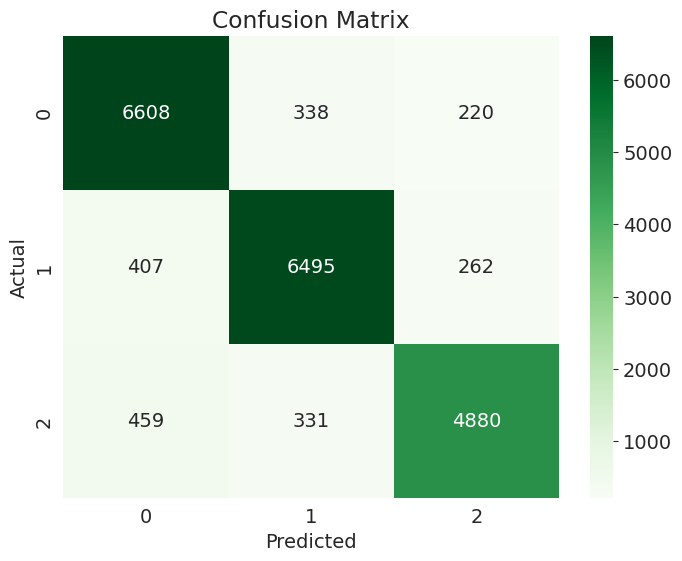

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, pred), annot=True,cmap='Greens',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**hyper parameter Optimization**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13]}
grid = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best K:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best K: {'n_neighbors': 13}
Best Accuracy: 0.9243124999999999


**UBIS End-to-End Machine Learning Pipeline**

In [ ]:
# =====================================================
#  UBIS: Unclaimed Balances Intelligence System (Full ML Pipeline)
#  Stage: Data Preprocessing → Feature Engineering → Clustering → Classification
# =====================================================

# --- IMPORTS ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# =====================================================
# LOAD MERGED DATA
# =====================================================
# This one is having lready merged datasets (CoreBanking + Behavioral + Registry)
UBIS_Merged_Dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UBIS/UBIS_Merged_Dataset_5M.csv.gz')

print(" Dataset Loaded Successfully!")
print(f"Shape: {UBIS_Merged_Dataset.shape}")
print(UBIS_Merged_Dataset.head())

 Dataset Loaded Successfully!
Shape: (5000000, 32)
                                  customer_id_hashed  account_tenure_days  \
0  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...                 3204   
1  d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...                 3537   
2  4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...                  890   
3  4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...                 1324   
4  ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...                 1160   

   txn_volume_30d  txn_volume_90d  avg_txn_value  peak_txn_value  \
0              13              22    1849.855831     6294.315050   
1              15              27    1392.211597     9495.973477   
2              16              22    1367.566138     6431.197167   
3              14              23    2167.097792    13984.558457   
4              13              23    1043.163770     6508.905587   

   avg_txn_gap_days  mean_balance_90d  balance_fluctuation_index  \
0        

In [ ]:
# =====================================================
# 2️ FEATURE ENGINEERING
# =====================================================

# --- Transaction Activity Ratio ---
UBIS_Merged_Dataset['txn_activity_ratio'] = (
    UBIS_Merged_Dataset['txn_volume_30d'] / (UBIS_Merged_Dataset['txn_volume_90d'] + 1)
)

# --- Balance Stability Index ---
UBIS_Merged_Dataset['balance_stability'] = 1 - UBIS_Merged_Dataset['balance_fluctuation_index']

# --- Engagement Index ---
UBIS_Merged_Dataset['engagement_index'] = (
    (UBIS_Merged_Dataset['login_freq_30d'] / 30) *
    (1 - UBIS_Merged_Dataset['failed_login_rate']) *
    (1 / (UBIS_Merged_Dataset['response_delay_mean'] + 1))
)

# --- Digital Activity Score ---
UBIS_Merged_Dataset['digital_activity_score'] = (
    UBIS_Merged_Dataset['login_freq_30d'] *
    UBIS_Merged_Dataset['device_count'] *
    UBIS_Merged_Dataset['geo_variance']
)

# --- Inactivity Gap ---
UBIS_Merged_Dataset['inactivity_gap'] = (
    UBIS_Merged_Dataset['days_since_last_txn'] + UBIS_Merged_Dataset['last_login_days_ago']
)

# --- Financial Health Score ---
UBIS_Merged_Dataset['financial_health_score'] = (
    UBIS_Merged_Dataset['avg_txn_value'] *
    UBIS_Merged_Dataset['deposit_withdrawal_ratio'] *
    (1 + UBIS_Merged_Dataset['loan_activity_flag'])
)

print("\n Feature Engineering Complete!")


 Feature Engineering Complete!


In [ ]:
# =====================================================
# SELECT FEATURES FOR UNSUPERVISED LEARNING
# =====================================================

features_for_clustering = [
    'txn_volume_30d', 'txn_volume_90d', 'avg_txn_value', 'avg_txn_gap_days',
    'mean_balance_90d', 'deposit_withdrawal_ratio', 'txn_activity_ratio',
    'balance_fluctuation_index', 'financial_health_score', 'login_freq_30d',
    'avg_session_duration', 'device_count', 'failed_login_rate', 'geo_variance',
    'mobile_app_updates', 'notification_open_rate', 'last_login_days_ago',
    'engagement_index', 'digital_activity_score', 'inactivity_gap', 'balance_stability'
]

In [ ]:
# =====================================================
# UNSUPERVISED LEARNING: K-MEANS CLUSTERING
# =====================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(UBIS_Merged_Dataset[features_for_clustering])

kmeans = KMeans(n_clusters=3, random_state=42)
UBIS_Merged_Dataset['cluster'] = kmeans.fit_predict(X_scaled)

# --- Label clusters ---
cluster_mapping = {0: 'Moderate', 1: 'Dormant', 2: 'Active'}
UBIS_Merged_Dataset['Account_Activity'] = UBIS_Merged_Dataset['cluster'].map(cluster_mapping)

print("\nK-Means Clustering Complete!")
print(UBIS_Merged_Dataset['Account_Activity'].value_counts())


K-Means Clustering Complete!
Account_Activity
Dormant     1797822
Active      1790728
Moderate    1411450
Name: count, dtype: int64


In [ ]:
# =====================================================
# SUPERVISED LEARNING: KNN CLASSIFICATION
# =====================================================

# --- Define X and y ---
X = UBIS_Merged_Dataset[features_for_clustering]
y = UBIS_Merged_Dataset['Account_Activity']

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Scale ---
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train KNN ---
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

# --- Predict ---
y_pred = knn.predict(X_test_scaled)

In [ ]:
# =====================================================
# MODEL EVALUATION
# =====================================================

print("\nKNN MODEL PERFORMANCE")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=['Active', 'Moderate', 'Dormant'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Active', 'Moderate', 'Dormant'])
disp.plot(cmap='Greens')
plt.title("UBIS KNN Confusion Matrix")
plt.show()

In [ ]:
# =====================================================
# 7PCA VISUALIZATION OF CLUSTERS
# =====================================================
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1],
                hue=UBIS_Merged_Dataset['Account_Activity'], palette='coolwarm')
plt.title("UBIS Clusters in 2D PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Account Activity")
plt.show()

print("\nPipeline Complete — UBIS System Ready!")